In [68]:
!{sys.executable} -m pip install functools
!{sys.executable} -m pip install pylab

/bin/sh: {sys.executable}: command not found
/bin/sh: {sys.executable}: command not found


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [97]:
df = pd.read_csv("/Users/hamin/Documents/bithumb_analysis/include/2018-05-btc-krw.csv")

In [98]:
# identifying column type 
df.dtypes

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [99]:
# creating 'price - quantity' connection - price가 같은것 끼리 묶는다.
quantity_price = df['quantity'].groupby(df['price'])

In [100]:
# price 별 quantity의 평균
quantity_price.mean()

price
7853000     0.017900
7858000     0.025233
7859000     1.535800
7862000     0.177140
7864000     0.087200
              ...   
10947000    0.001800
10948000    0.400000
10949000    0.162600
10951000    0.761850
10953000    0.198450
Name: quantity, Length: 2749, dtype: float64

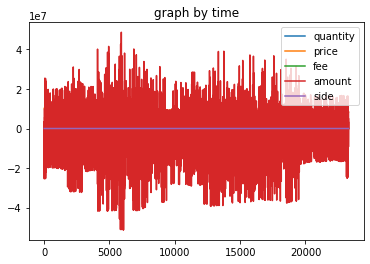

In [101]:
# 시간 별 모든 요소 그래프 (amount가 변동폭이 커서 나머지는 잘 안보인다)
df.plot(title='graph by time')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/graph_by_time.png', dpi=300)

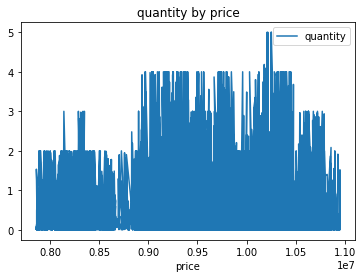

In [102]:
# price-quantity 간 그래프
df.plot(x='price', y='quantity', title='quantity by price')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/quantity_by_price.png', dpi=300)

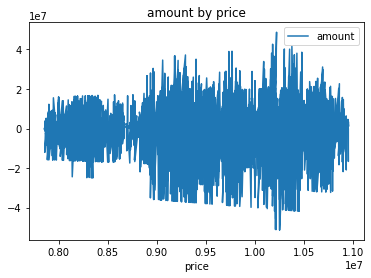

In [103]:
# price-amount 간 그래프
df.plot(x='price', y='amount', title='amount by price')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/amount_by_price.png', dpi=300)

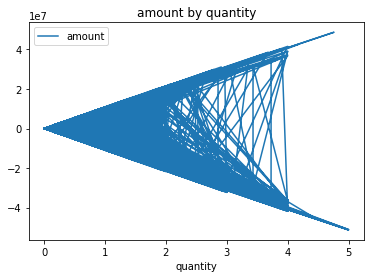

In [104]:
# quantity-amount 간 그래프
df.plot(x='quantity', y='amount', title='amount by quantity')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/amount_by_quantity.png', dpi=300)

In [105]:
# 가격을 10 구간 으로 구간 나눔
factor_price=pd.cut(df.price,10)

In [106]:
factor_price

0        (10023000.0, 10333000.0]
1        (10023000.0, 10333000.0]
2        (10023000.0, 10333000.0]
3        (10023000.0, 10333000.0]
4        (10023000.0, 10333000.0]
                   ...           
23290      (8163000.0, 8473000.0]
23291      (8163000.0, 8473000.0]
23292      (8163000.0, 8473000.0]
23293      (8163000.0, 8473000.0]
23294      (8163000.0, 8473000.0]
Name: price, Length: 23295, dtype: category
Categories (10, interval[float64]): [(7849900.0, 8163000.0] < (8163000.0, 8473000.0] < (8473000.0, 8783000.0] < (8783000.0, 9093000.0] ... (9713000.0, 10023000.0] < (10023000.0, 10333000.0] < (10333000.0, 10643000.0] < (10643000.0, 10953000.0]]

In [107]:
group_quantity_by_priceGroup = df['quantity'].groupby(factor_price)

In [108]:
group_quantity_by_priceGroup.size()

price
(7849900.0, 8163000.0]       865
(8163000.0, 8473000.0]      2012
(8473000.0, 8783000.0]       451
(8783000.0, 9093000.0]      1535
(9093000.0, 9403000.0]      5297
(9403000.0, 9713000.0]      3755
(9713000.0, 10023000.0]     2686
(10023000.0, 10333000.0]    2525
(10333000.0, 10643000.0]    2887
(10643000.0, 10953000.0]    1282
Name: quantity, dtype: int64

In [109]:
group_quantity_by_priceGroup.mean()

price
(7849900.0, 8163000.0]      0.293303
(8163000.0, 8473000.0]      0.320612
(8473000.0, 8783000.0]      0.316740
(8783000.0, 9093000.0]      0.362410
(9093000.0, 9403000.0]      0.327199
(9403000.0, 9713000.0]      0.313020
(9713000.0, 10023000.0]     0.336113
(10023000.0, 10333000.0]    0.336947
(10333000.0, 10643000.0]    0.347056
(10643000.0, 10953000.0]    0.317029
Name: quantity, dtype: float64

In [110]:
group_quantity_by_priceGroup.sum()

price
(7849900.0, 8163000.0]       253.707295
(8163000.0, 8473000.0]       645.071073
(8473000.0, 8783000.0]       142.849824
(8783000.0, 9093000.0]       556.298804
(9093000.0, 9403000.0]      1733.175172
(9403000.0, 9713000.0]      1175.390707
(9713000.0, 10023000.0]      902.798997
(10023000.0, 10333000.0]     850.792245
(10333000.0, 10643000.0]    1001.949869
(10643000.0, 10953000.0]     406.430650
Name: quantity, dtype: float64

In [111]:
group_quantity_by_priceGroup_table = [group_quantity_by_priceGroup.size(), group_quantity_by_priceGroup.mean(), group_quantity_by_priceGroup.sum()]
quantity_by_priceGroup = reduce(lambda left, right: pd.merge(left,right, on='price'), group_quantity_by_priceGroup_table)
quantity_by_priceGroup.columns = ["# of quantity", "mean of quantity", "sum of quantity"]

In [112]:
quantity_by_priceGroup

,# of quantity,mean of quantity,sum of quantity
price,,,
"(7849900.0, 8163000.0]",865,0.293303,253.707295
"(8163000.0, 8473000.0]",2012,0.320612,645.071073
"(8473000.0, 8783000.0]",451,0.316740,142.849824
"(8783000.0, 9093000.0]",1535,0.362410,556.298804
"(9093000.0, 9403000.0]",5297,0.327199,1733.175172
"(9403000.0, 9713000.0]",3755,0.313020,1175.390707
"(9713000.0, 10023000.0]",2686,0.336113,902.798997
"(10023000.0, 10333000.0]",2525,0.336947,850.792245
"(10333000.0, 10643000.0]",2887,0.347056,1001.949869


In [113]:
quantity_by_priceGroup.to_csv("/Users/hamin/Documents/bithumb_analysis/table/quantity by price Group.csv")

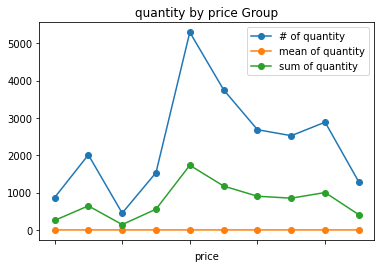

In [114]:
# priceGroup-quantity 간 그래프
quantity_by_priceGroup.plot(title='quantity by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/quantity_by_price_Group.png', dpi=300)

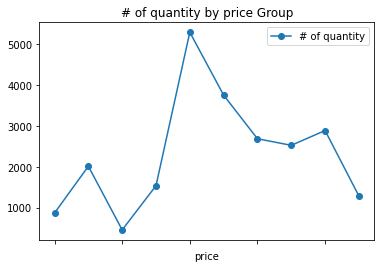

In [115]:
# priceGroup-# of quantity 간 그래프
quantity_by_priceGroup.plot(y='# of quantity',title='# of quantity by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/#_of_quantity_by_price_Group.png', dpi=300)

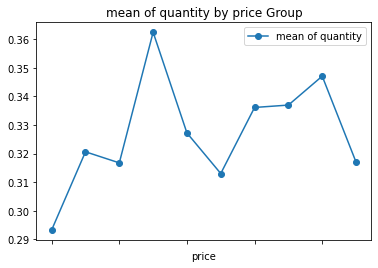

In [116]:
# priceGroup-mean of quantity 간 그래프
quantity_by_priceGroup.plot(y='mean of quantity',title='mean of quantity by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/mean_of_quantity_by_price_Group.png', dpi=300)

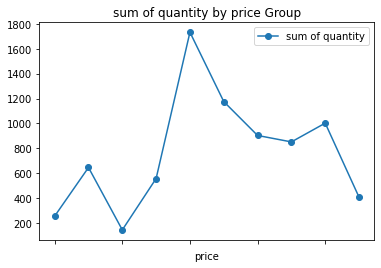

In [117]:
# priceGroup-sum of quantity 간 그래프
quantity_by_priceGroup.plot(y='sum of quantity',title='sum of quantity by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/sum_of_quantity_by_price_Group.png', dpi=300)

In [29]:
group_price = df.price.groupby(factor_price)
group_price.agg(['count','mean','std','min','max'])

,count,mean,std,min,max
price,,,,,
"(7849900.0, 8163000.0]",865,8.047392e+06,94355.661763,7853000,8163000
"(8163000.0, 8473000.0]",2012,8.300363e+06,72279.504511,8164000,8470000
"(8473000.0, 8783000.0]",451,8.600290e+06,66281.905508,8474000,8777000
"(8783000.0, 9093000.0]",1535,8.980325e+06,80045.109448,8785000,9093000
"(9093000.0, 9403000.0]",5297,9.250605e+06,84228.996138,9094000,9403000
"(9403000.0, 9713000.0]",3755,9.534994e+06,88949.690136,9404000,9713000
"(9713000.0, 10023000.0]",2686,9.836159e+06,91984.828153,9714000,10023000
"(10023000.0, 10333000.0]",2525,1.019519e+07,90127.853737,10024000,10333000
"(10333000.0, 10643000.0]",2887,1.046763e+07,98972.464144,10334000,10643000


In [30]:
group_price.head()

0        10164000
1        10163000
2        10163000
3        10162000
4        10153000
121      10010000
122      10021000
123      10018000
124      10006000
129       9922000
1412     10334000
1413     10359000
1418     10368000
1419     10358000
1420     10351000
1555     10648000
1560     10653000
1561     10660000
1562     10659000
1563     10660000
7875      9700000
7876      9700000
7877      9700000
7878      9700000
7879      9700000
8311      9397000
8312      9395000
8313      9394000
8314      9392000
8315      9370000
9359      9092000
9377      9092000
9378      9092000
9379      9083000
9380      9092000
19958     8777000
19960     8776000
19966     8773000
19970     8776000
19971     8776000
20184     8470000
20185     8470000
20186     8470000
20187     8470000
20188     8470000
21605     8156000
21607     8137000
21608     8137000
21609     8163000
21611     8162000
Name: price, dtype: int64

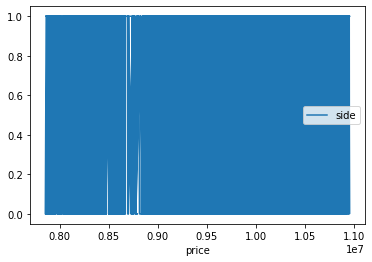

In [10]:
# price-side 간 그래프 (더 연구할 필요 있음,,,)
df.plot(x='price', y='side')

In [11]:
plt.figure();

<Figure size 432x288 with 0 Axes>

In [ ]:
df.plot.bar(stacked=True);

In [ ]:
df2.plot.barh(stacked=True);

In [ ]:
df.iloc[5].plot(kind='bar')

KeyboardInterrupt: 

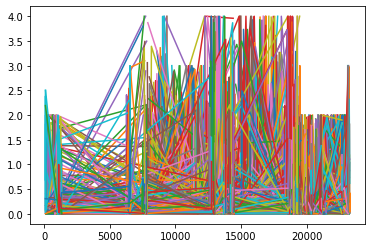

In [6]:
# price-quantity 그래프 인데 왜 이런지 모르겠다,,,,
quantity_price.plot()